In [1]:
# plot detail of mouse gas


In [22]:
import pandas as pd
from velocity_plot import velocity_plot as vpl
from colormap import *
def vaildation_plot(gene,validation_result,save_path_validation):
    plt.figure()
    plt.scatter(validation_result.epoch, validation_result.cost)
    plt.title(gene)
    plt.savefig(save_path_validation)

n_gene=10
raw_data_path="/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25.csv"
load_raw_data=pd.read_csv(raw_data_path)
# auto stop
detail_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/result_detailcsv/all_geneepoch200check_n5Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0/detail_e200.csv'
brief_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/result_detailcsv/all_geneepoch200check_n5Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0/brief_e200.csv'
load_detail_data=pd.read_csv (detail_path,index_col=False)
load_brief_data=pd.read_csv (brief_path,index_col=False)


gene_choice=['Sox17', '2410006H16Rik', 'Smim1', 'Hba-x', 'Abi3', 'Akap12', 'Car4', 'Degs1','Dhrs11','Fn1','Grb10','H2afv','Hba-a1','Hba-x','Hspd1','Hspe1','Igf1','Igf2bp1','Klf7','Sgk3','Slc4a1','Tagln2','Timp3','Tns3','Tpd52l1','Ube2d1','Ugp2']

colors = {'Erythroid2':'purple',
'Blood progenitors 2':'orange',
'Erythroid3':'brown',
'Erythroid1':'red',
'Blood progenitors 1':'blue',
'Haematoendothelial progenitors':'pink',
'Blood progenitors 1':'blue'}



/Users/wanglab/.local/lib/python3.7/site-packages/matplotlib/quiver.py:671: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
/Users/wanglab/.local/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/Users/wanglab/.local/lib/python3.7/site-packages/matplotlib/quiver.py:671: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
/Users/wanglab/.local/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/guangyuwang/opt/anaconda3/envs/celldancer/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


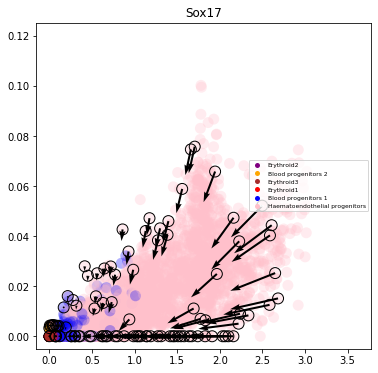

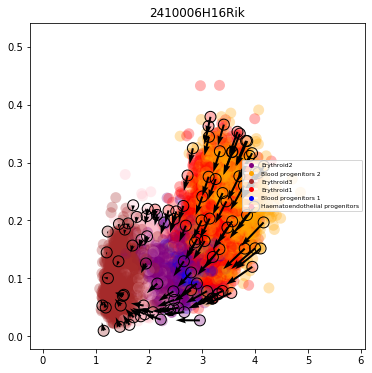

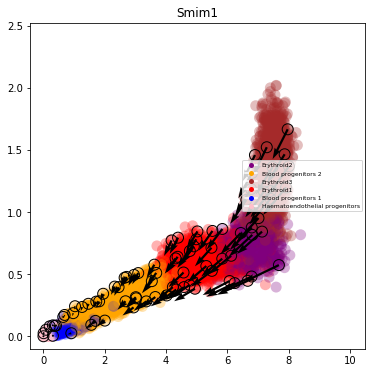

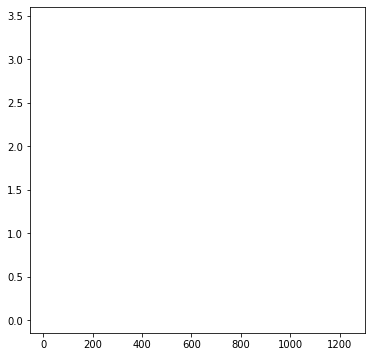

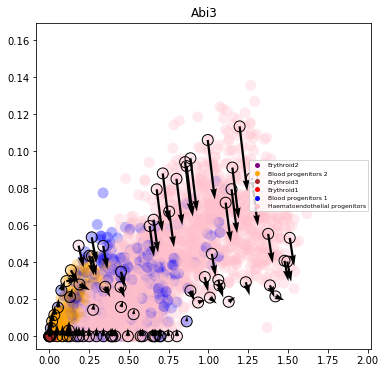

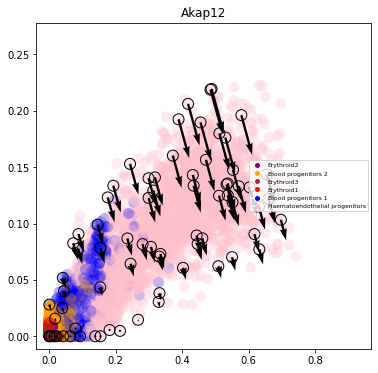

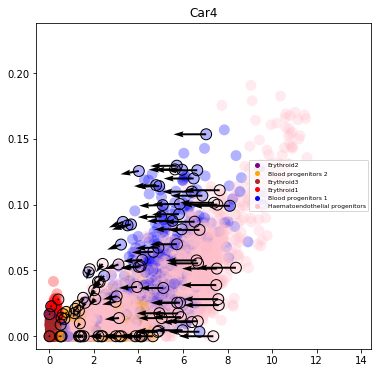

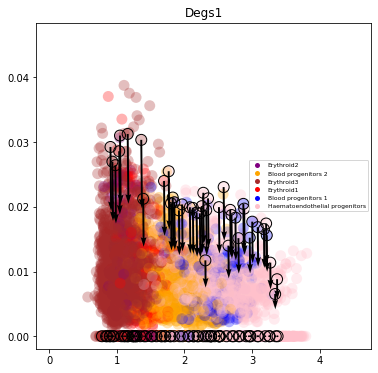

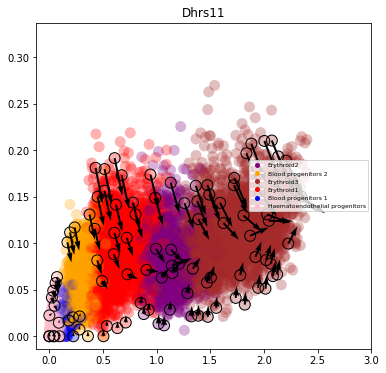

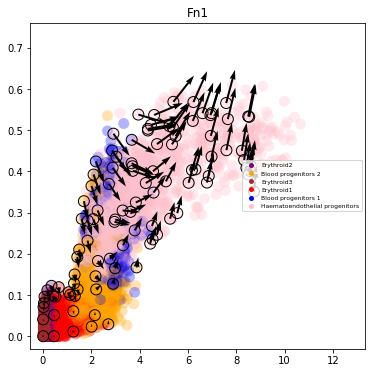

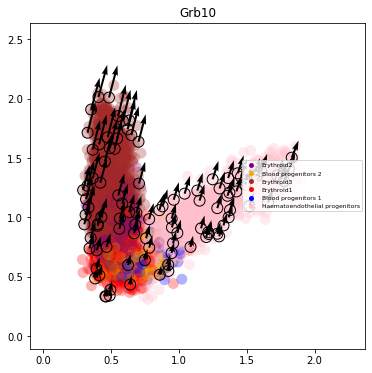

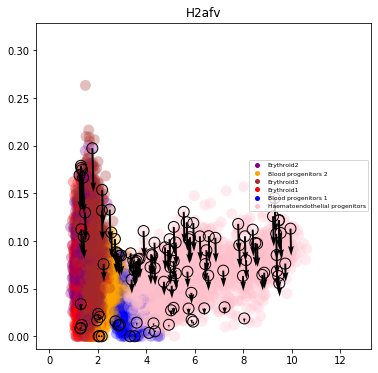

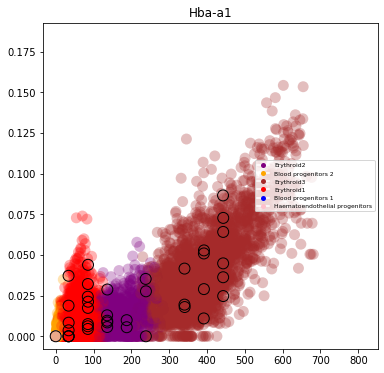

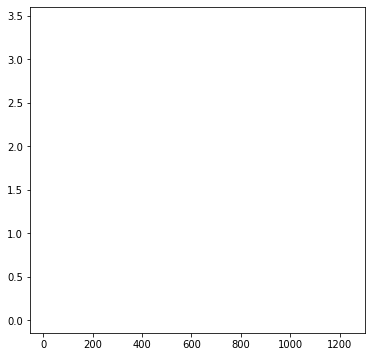

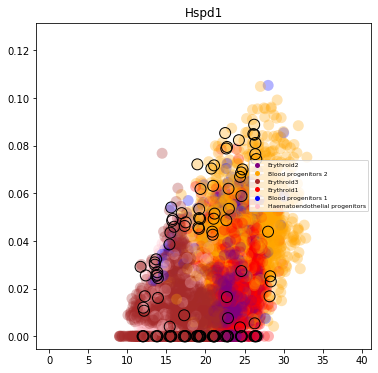

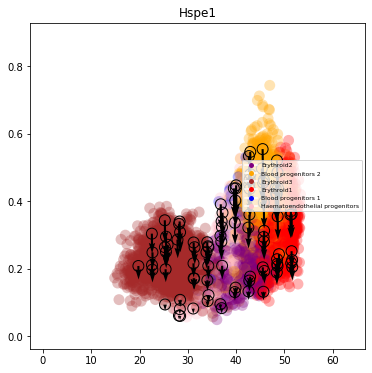

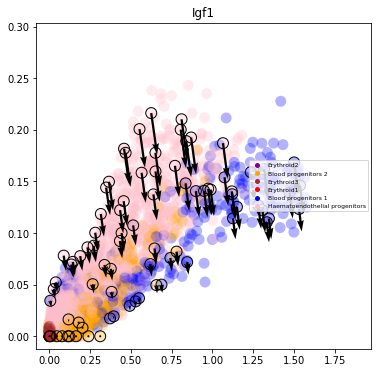

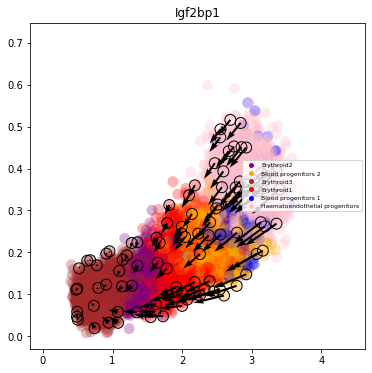

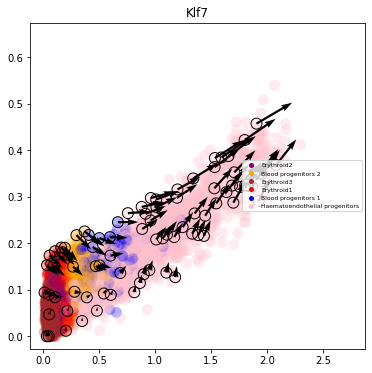

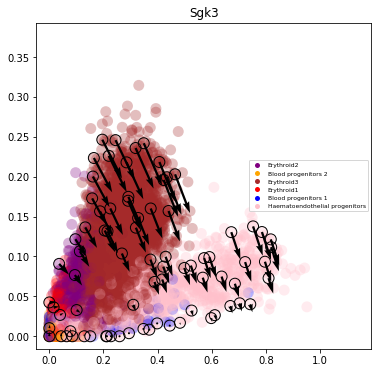

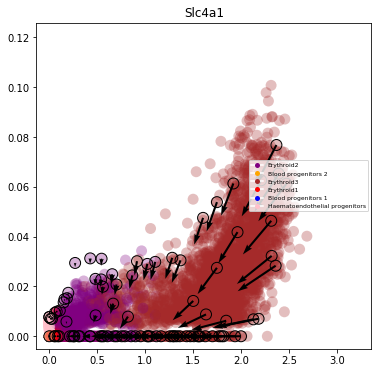

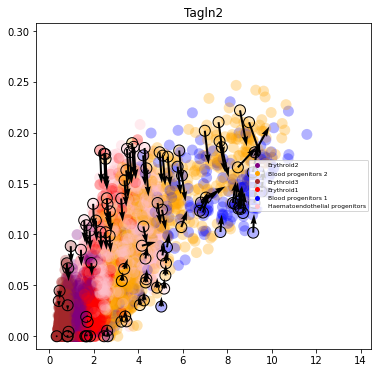

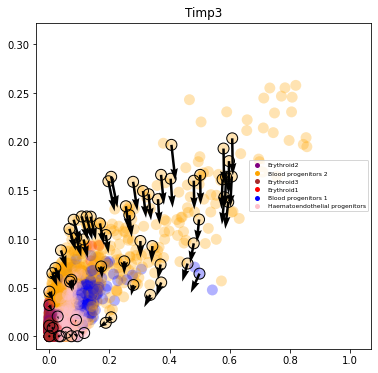

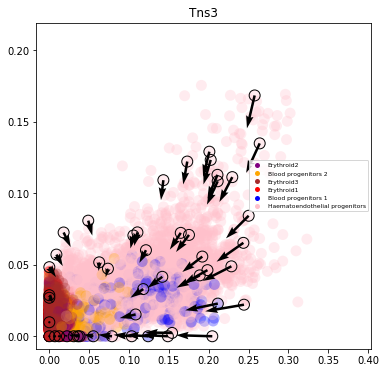

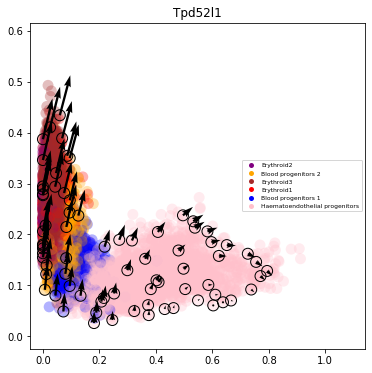

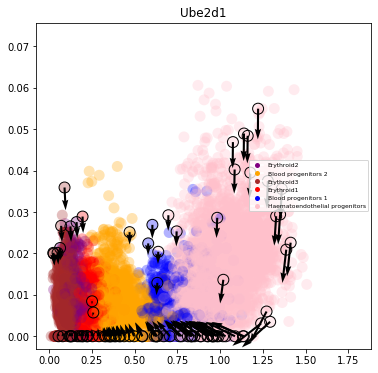

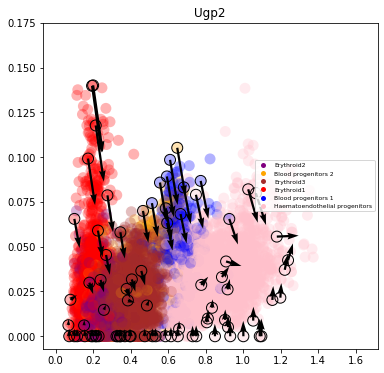

In [32]:
from sampling import sampling_neighbors
#auto stop
save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/result_detailcsv/all_geneepoch200check_n5Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0/'
one_gene_raw=load_raw_data[load_raw_data.gene_list==load_raw_data.gene_list.iloc[0]]
cluster_info=one_gene_raw['clusters']
for gene in gene_choice:
    # color_scatter=None
    # velocity_plot([gene],load_detail_data,color_scatter,pointsize,alpha_inside,color_map,vmin,vmax,(save_path+'celldancer_'+gene+'_colorful.pdf'),step_i,step_j,show_arrow=True,custom_map=one_gene_raw['clusters'].map(colors))
    # color_scatter="#95D9EF"
    # vpl.velocity_gene(gene,load_detail_data,save_path=(save_path+'celldancer_'+gene+'_blue.pdf'))
    # velocity_gene(gene,load_detail_data,colors=colors,save_path=None,cluster_info=cluster_info,mode='cluster')
    try: 
        velocity_gene(gene,load_detail_data,colors=colors,save_path=save_path+'velocity_'+gene+'.pdf',cluster_info=cluster_info,mode='cluster',cluster_annot=True)
    except:
        print()
####################################
# import pandas as pd
# from velocity_plot import velocity_plot as vpl

# raw_data_path="/Users/shengyuli/OneDrive - Houston Methodist/work/Velocity/data/velocyto/neuro/raw_data/denGyr_full.csv"
# load_raw_data=pd.read_csv(raw_data_path,names=['gene_list', 'u0','s0',"clusters",'cellID','embedding1','embedding2'])
# load_detail_data=pd.read_csv ('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/detail_e301.csv',index_col=False)

# one_gene_raw=load_raw_data[load_raw_data.gene_list==load_raw_data.gene_list.iloc[0]]
# cluster_info=one_gene_raw['clusters']
# vpl.velocity_gene('Ablim1',load_detail_data,save_path=None)
# vpl.velocity_gene('Ablim1',load_detail_data,save_path=None,cluster_info=cluster_info,mode='cluster')
# vpl.velocity_gene('Ablim1',load_detail_data,save_path=None,cluster_info=cluster_info,mode='cluster',cluster_annot=True)




In [26]:

    def velocity_gene(gene,detail,colors=None,color_scatter="#95D9EF",point_size=120,alpha_inside=0.3,v_min=None,v_max=None,save_path=None,step_i=15,step_j=15,show_arrow=True,cluster_info=None,mode=None,cluster_annot=False):
        
        '''Gene velocity plot.
        '''

        plt.figure(None,(6,6))
        u_s= np.array(detail[detail['gene_name']==gene][["u0","s0","u1","s1"]]) # u_s

        max_u_s=np.max(u_s, axis = 0)
        u0_max=max_u_s[0]
        s0_max=max_u_s[1]
        y_max=1.25*u0_max
        x_max=1.25*s0_max

        sampling_idx=sampling_neighbors(u_s[:,0:2], step_i=step_i,step_j=step_j) # Sampling
        u_s_downsample = u_s[sampling_idx,0:4]
        # layer1=plt.scatter(embedding[:, 1], embedding[:, 0],
        #             alpha=alpha_inside, s=point_size, edgecolor="none",c=detail[detail['gene_name'].isin(genelist)].alpha_new, cmap=colormap,vmin=v_min,vmax=v_max)
        #u_s= np.array(detail[detail['gene_name'].isin(gene)][["u0","s0","u1","s1"]])
        #u_s= np.array(detail[detail['gene_name'].isin(gene)][["u0","s0","u1","s1"]])

        plt.xlim(-0.05*s0_max, x_max) 
        plt.ylim(-0.05*u0_max, y_max) 

        title_info=gene
        if (cluster_info is not None) and (mode == 'cluster'):

            custom_map=cluster_info.map(colors)
            title_info=gene
            layer1=plt.scatter(u_s[:, 1], u_s[:, 0],
                alpha=alpha_inside, s=point_size, edgecolor="none",
                #c=pd.factorize(cluster_info)[0], 
                c=custom_map)
            
            if cluster_annot:
                from matplotlib.lines import Line2D
                def gen_Line2D(label, markerfacecolor):
                    return Line2D([0], [0], color='w', marker='o', label=label, markerfacecolor=markerfacecolor,  markeredgewidth=0, markersize=5)
                legend_elements = []
                for i in colors:
                    legend_elements.append(gen_Line2D(i, colors[i]))
                plt.legend(handles=legend_elements, loc='right', prop={'size': 6})

            #plt.colorbar(layer1)
        # para in gene velocity # not using
        # para=None,colormap=None
        # elif (colormap is not None) and (para is not None):
        #     title_info=gene+' '+para
        #     layer1=plt.scatter(u_s[:, 1], u_s[:, 0],
        #         alpha=1, s=point_size, edgecolor="none",
        #         c=detail[detail['gene_name']==gene][para],cmap=colormap,vmin=v_min,vmax=v_max)
        #     plt.colorbar(layer1)
        elif color_scatter is not None:
            layer1=plt.scatter(u_s[:, 1], u_s[:, 0],
                    alpha=alpha_inside, s=point_size, edgecolor="none",color=color_scatter,vmin=v_min,vmax=v_max)
        if show_arrow:
            plt.scatter(u_s_downsample[:, 1], u_s_downsample[:, 0], # sampled circle
                        color="none",s=point_size, edgecolor="k")
            pcm1 = plt.quiver(
            u_s_downsample[:, 1], u_s_downsample[:, 0], u_s_downsample[:, 3]-u_s_downsample[:, 1], u_s_downsample[:, 2]-u_s_downsample[:, 0],
            angles='xy', clim=(0., 1.))
        plt.title(title_info)
        if save_path is not None:
            plt.savefig(save_path)